In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import nan as NA
import pydataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

In [8]:



x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test) 
pred

accuracy_score(y_test,pred)

0.9532163742690059

In [7]:
min_samples_leaf=1, 

0.9415204678362573

In [104]:
#Soft Voting 사용 
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

cancer = load_breast_cancer()
x_tr,x_te,y_tr,y_te = train_test_split(cancer.data,cancer.target, test_size=0.2, random_state=156)
l = LogisticRegression(solver='liblinear')
k = KNeighborsClassifier(n_neighbors=8) 
d=DecisionTreeClassifier()

vo_clf=VotingClassifier(estimators=[('LR',l), ('knn',k), ('D',d)],voting= 'soft')
vo_clf.fit(x_tr,y_tr)
pred=vo_clf.predict(x_te)
accuracy_score(y_te,pred)

0.9385964912280702

In [106]:
vo_clf=VotingClassifier(estimators=[('LR',l), ('knn',k)],voting= 'soft')
vo_clf.fit(x_tr,y_tr)
pred=vo_clf.predict(x_te)
accuracy_score(y_te,pred)

##?d위에가 더 낮아야댐 

0.956140350877193

In [107]:
from pydataset import data
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from pydataset import data
mpg = data('mpg')
x_tr,x_te,y_tr,y_te = train_test_split(mpg.iloc[:,[2,4,7,8]],mpg['class'],test_size=0.2)
p = {'max_depth':[8,16],'min_samples_split':[2,8,16], 'min_samples_leaf':[6,12], 'n_estimators':[100,200]}
r = RandomForestClassifier(n_jobs=-1, random_state=1234)
gr = GridSearchCV(r,param_grid=p,cv=2,n_jobs=-1) 
gr.fit(x_tr, y_tr)
#최적의 파라미터를 찾고 그때의 정확도를 구하기 
gr_best=gr.best_params_
best= gr.best_estimator_
accuracy_score(y_te,best.predict(x_te))

0.5319148936170213

<Axes: >

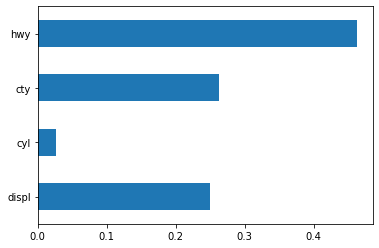

In [111]:
#중요한 feature 쓰고 그래프 만들기 
ftr_imp_values= best.feature_importances_
ftr_imp= pd.Series(ftr_imp_values, index=x_tr.columns  )
ftr_imp.plot(kind='barh')

## GBM

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']
column_index    42
dtype: int64
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}
Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8677
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 6}
결정 트리 예측 정확도: 0.8029
결정 트리 예측 정확도:0.8310
결정 트리 예측 정확도:0.8310


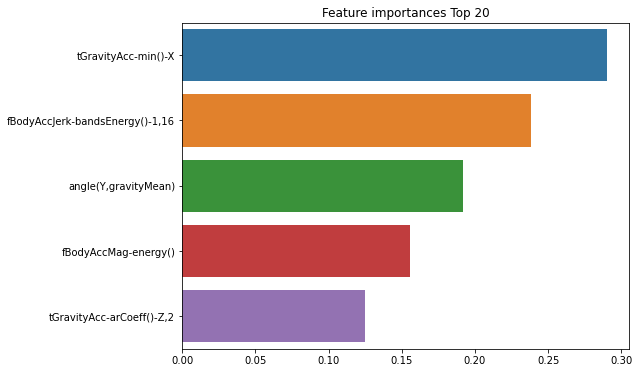

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10]) 

#중복된 피처명을 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()


#원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생.
#중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    X_train = X_train[['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)', 'fBodyAccMag-energy()','tGravityAcc-arCoeff()-Z,2'] ]
    X_test = X_test[['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)', 'fBodyAccMag-energy()','tGravityAcc-arCoeff()-Z,2'] ] 

       # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

from sklearn.model_selection import GridSearchCV

params = { 'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()



In [115]:
X_train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)

In [128]:
X_train = X_train[['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)', 'fBodyAccMag-energy()','tGravityAcc-arCoeff()-Z,2'] ]
X_test = X_test[['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)', 'fBodyAccMag-energy()','tGravityAcc-arCoeff()-Z,2'] ] 
X_train

,tGravityAcc-min()-X,"fBodyAccJerk-bandsEnergy()-1,16","angle(Y,gravityMean)",fBodyAccMag-energy(),"tGravityAcc-arCoeff()-Z,2"
0,0.977436,-0.999982,0.179941,-0.998285,0.995675
1,0.984520,-0.999987,0.180289,-0.999472,0.834271
2,0.986770,-0.999963,0.180637,-0.999807,0.714392
3,0.986821,-0.999978,0.181935,-0.999770,0.386373
4,0.987434,-0.999988,0.185151,-0.999873,0.239268
...,...,...,...,...,...
7347,0.920554,-0.775736,0.238604,-0.584282,0.802503
7348,0.920554,-0.780751,0.252676,-0.632536,0.721749
7349,0.933008,-0.783616,0.249145,-0.641170,0.835444
7350,0.933008,-0.821137,0.246432,-0.663579,0.858624


In [143]:
from sklearn.ensemble import GradientBoostingClassifier
import time
X_train, X_test, y_train, y_test = get_human_dataset()
X_train = X_train[['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)', 'fBodyAccMag-energy()','tGravityAcc-arCoeff()-Z,2'] ]
X_test = X_test[['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)', 'fBodyAccMag-energy()','tGravityAcc-arCoeff()-Z,2'] ] 
#GBM 수행시간 측정
start_time=time.time()
gb_clf=GradientBoostingClassifier(random_state=6)
gb_clf.fit(X_train,y_train)
pred=gb_clf.predict(X_test)
acc=accuracy_score(y_test,pred)
end_time=time.time()
print(acc)
print(f"걸린시간 : {end_time - start_time: .1f}초")

/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.835086528673227
걸린시간 :  6.4초


In [ ]:
# x_train.ravel  => 사용해서 평평하게 펴주면 에러 안뜸 

In [153]:
! conda install -c  py- xgboost


# >>>>>>>>>>>>>>>>>>>>>> ERROR REPORT <<<<<<<<<<<<<<<<<<<<<<

    Traceback (most recent call last):
      File "/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/conda/gateways/repodata/__init__.py", line 161, in conda_http_errors
        yield
      File "/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/conda/gateways/repodata/__init__.py", line 127, in repodata
        response.raise_for_status()
      File "/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/requests/models.py", line 953, in raise_for_status
        raise HTTPError(http_error_msg, response=self)
    requests.exceptions.HTTPError: 404 Client Error: Not Found for url: https://conda.anaconda.org/py-/osx-64/current_repodata.json
    
    During handling of the above exception, another exception occurred:
    
    Traceback (most recent call last):
      File "/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/conda/exceptions.py", line 1132, in __call__
        return func(*args, **kwargs)
      File

In [174]:
from xgboost import XGBClassifier

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train) 

xgb_clf=XGBClassifier(n_estimators=400, learning_rate = 0.05, max_depth=3, 
                      eval_metric='logloss')
xgb_clf.fit(x_train,y_train, verbose=True)
pred=xgb_clf.predict(x_test)
pred_proba= xgb_clf.predict_proba(x_test)[:,1]

accuracy_score(y_test,pred)

/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9883040935672515

In [164]:
xgb_clf.predict_proba(x_test)
np.round(pred_proba)

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0.], dtype=float32)

In [177]:
xgb_clf=XGBClassifier(n_estimators=400, learning_rate = 0.05, max_depth=3)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train)
evals=[(x_tr,y_tr),(x_val,y_val)]
xgb_clf.fit(x_tr,y_tr,early_stopping_rounds=30, eval_metric='logloss',
            eval_set=evals, verbose=True)
pred50=xgb_clf.predict(x_test)
pred50_proba= xgb_clf.predict_proba(x_test)[:,1]
accuracy_score(y_test,pred)

[0]	validation_0-logloss:0.65036	validation_1-logloss:0.65607
[1]	validation_0-logloss:0.61152	validation_1-logloss:0.62271
[2]	validation_0-logloss:0.57610	validation_1-logloss:0.59213
[3]	validation_0-logloss:0.54366	validation_1-logloss:0.56505
[4]	validation_0-logloss:0.51385	validation_1-logloss:0.53957
[5]	validation_0-logloss:0.48638	validation_1-logloss:0.51690
[6]	validation_0-logloss:0.46101	validation_1-logloss:0.49542
[7]	validation_0-logloss:0.43752	validation_1-logloss:0.47628
[8]	validation_0-logloss:0.41573	validation_1-logloss:0.45860
[9]	validation_0-logloss:0.39487	validation_1-logloss:0.43997
[10]	validation_0-logloss:0.37547	validation_1-logloss:0.42269
[11]	validation_0-logloss:0.35740	validation_1-logloss:0.40724
[12]	validation_0-logloss:0.34088	validation_1-logloss:0.39461
[13]	validation_0-logloss:0.32504	validation_1-logloss:0.38053
[14]	validation_0-logloss:0.31039	validation_1-logloss:0.36953
[15]	validation_0-logloss:0.29685	validation_1-logloss:0.36006
[1

/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[95]	validation_0-logloss:0.03428	validation_1-logloss:0.17891
[96]	validation_0-logloss:0.03372	validation_1-logloss:0.17916
[97]	validation_0-logloss:0.03324	validation_1-logloss:0.17935
[98]	validation_0-logloss:0.03280	validation_1-logloss:0.17866
[99]	validation_0-logloss:0.03232	validation_1-logloss:0.17905
[100]	validation_0-logloss:0.03188	validation_1-logloss:0.17926
[101]	validation_0-logloss:0.03142	validation_1-logloss:0.17920
[102]	validation_0-logloss:0.03102	validation_1-logloss:0.17946
[103]	validation_0-logloss:0.03061	validation_1-logloss:0.17969
[104]	validation_0-logloss:0.03023	validation_1-logloss:0.17923
[105]	validation_0-logloss:0.02986	validation_1-logloss:0.17947
[106]	validation_0-logloss:0.02944	validation_1-logloss:0.17869
[107]	validation_0-logloss:0.02907	validation_1-logloss:0.17885
[108]	validation_0-logloss:0.02873	validation_1-logloss:0.17910
[109]	validation_0-logloss:0.02838	validation_1-logloss:0.17938
[110]	validation_0-logloss:0.02805	validation

0.9883040935672515

In [178]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

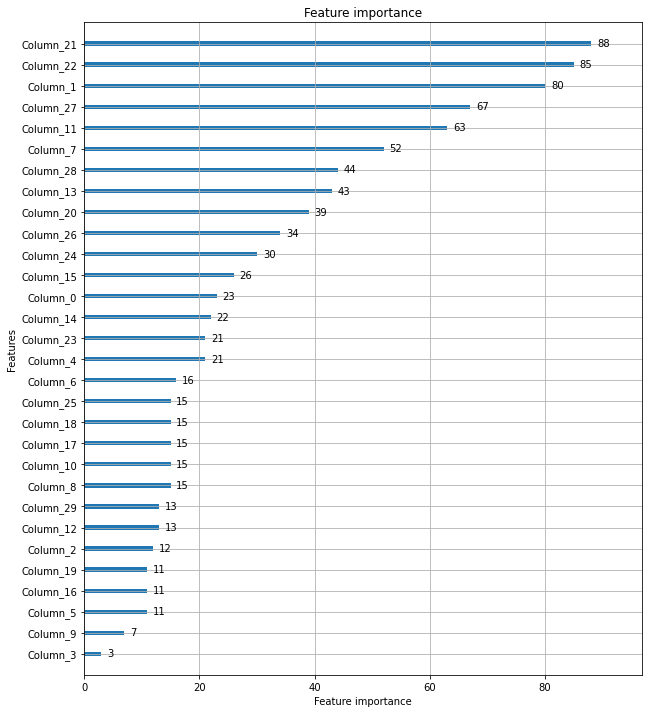

In [180]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)